In [60]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torch.nn as nn
import torchvision
from PIL import Image
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pandas as pd
import csv
import cv2
from tqdm import tqdm
from matplotlib.ticker import MaxNLocator

from lightly.data import LightlyDataset, SimCLRCollateFunction, collate
# plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.facecolor']='white'

In [4]:
#load
path = "/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/draw/WAIRD/00743_0.001_res.csv"
# path = "/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/draw/WAIRD/00247.csv"
# path = '/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/draw/DeepMIMO/O1blockage.csv'

In [5]:
df = pd.read_csv(path)
df

,Res_CFR,Res_ADP,Res_CFRADP,Res_multi_CFRADP,Res_multi_perfectCFRADP
0,26.429324,21.546420,15.972656,9.857402,10.055661
1,17.309831,15.058927,14.566403,5.395424,5.675204
2,15.702883,11.895736,14.265774,5.606839,5.034005
3,14.628383,10.466844,13.996264,5.630704,4.966957
4,15.704016,11.610820,11.430974,4.657739,4.580652
...,...,...,...,...,...
145,7.481681,7.344786,7.378280,2.768645,1.680582
146,7.879711,7.526468,6.718198,3.129768,1.908172
147,7.660157,6.345076,6.892515,3.027903,1.858454
148,7.543723,6.706116,7.030143,2.725769,1.722641


In [6]:
df.loc[0:]

,Res_CFR,Res_ADP,Res_CFRADP,Res_multi_CFRADP,Res_multi_perfectCFRADP
0,26.429324,21.546420,15.972656,9.857402,10.055661
1,17.309831,15.058927,14.566403,5.395424,5.675204
2,15.702883,11.895736,14.265774,5.606839,5.034005
3,14.628383,10.466844,13.996264,5.630704,4.966957
4,15.704016,11.610820,11.430974,4.657739,4.580652
...,...,...,...,...,...
145,7.481681,7.344786,7.378280,2.768645,1.680582
146,7.879711,7.526468,6.718198,3.129768,1.908172
147,7.660157,6.345076,6.892515,3.027903,1.858454
148,7.543723,6.706116,7.030143,2.725769,1.722641


In [72]:
#不同的path，更改epoch,color,marker 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def draw_line_charts(df):
    num_columns = df.shape[1]
    colors = plt.cm.rainbow(np.linspace(0, 1, num_columns))

    for i, column in enumerate(df.columns):
        epoch = range(len(df[column]))
#         epoch = range(2, len(df[column])+2)
        loss = df[column]
        color = colors[i]
        plt.plot(epoch, loss, color=color, marker='o', label=f'{column}')

    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))#控制x轴显示为整数
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Line Chart')
    plt.legend()
    plt.grid(False)
    plt.show()
   

def draw_line_charts_marker(df):
    num_columns = df.shape[1]
    colors = plt.cm.rainbow(np.linspace(0, 1, num_columns))
#     colors = ['b', 'g', 'r', 'b', 'g', 'r']
#     markers = ['o', 'o', 'o', 'v', 'v', 'v']  # Specify markers for each column
    markers = ['o', 'o', 'o', 'o', 'o', 'o']


    for i, column in enumerate(df.columns):
#         epoch = range(len(df[column]))
        epoch = range(0, len(df[column])+0)
        loss = df[column]
        color = colors[i]
        marker = markers[i+0]
#         marker = markers[i % len(markers)]  # Select marker based on column index
        plt.plot(epoch, loss, color=color, marker=marker, label=f'{column}', markersize=3, linewidth=1.0)

    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))#控制x轴显示为整数
    plt.xlabel('Epochs')
    plt.ylabel('MSE(m)')
    plt.title('Multi-Spot Localization')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
import pandas as pd

data = {'Epoch': range(10),
        'Column1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Column2': [3, 6, 4, 8, 2, 9, 7, 5, 1, 2],
        'Column3': [5, 4, 3, 7, 6, 9, 8, 1, 2, 4],
        'Column4': [2, 5, 8, 1, 3, 7, 9, 2, 4, 6]}

# df = pd.DataFrame(data)
# draw_line_charts_marker(df)




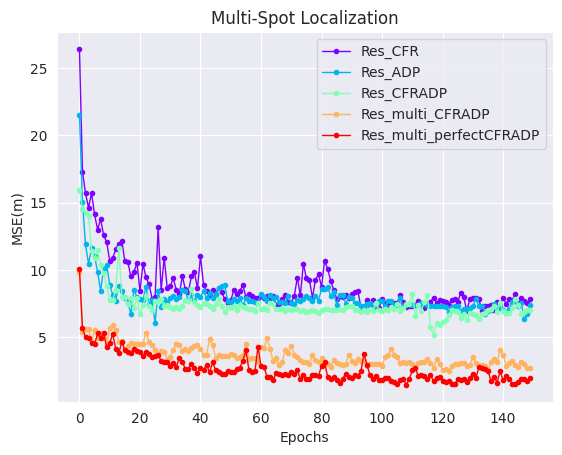

In [75]:
# draw_line_charts_marker(df.loc[:20])
# draw_line_charts(df.loc[2:])
draw_line_charts_marker(df)

In [64]:
path_maxpathnum = '/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/generated_2_60_0_1000_0_1_8_8_1_1_1_50_64/00743/draw/Copy of maxpathnum.csv'
df_maxpathnum = pd.read_csv(path_maxpathnum)
df_maxpathnum

,maxpathnum,Res_CFR,Res_ADP,Res_prior,Res_multi_prior,Res_multi_perfectprior
0,10,9.10,7.54,7.69,2.58,1.49
1,50,9.26,7.91,8.11,2.80,1.82
2,100,9.40,8.06,8.28,2.98,1.96
3,1000,9.48,8.15,8.40,3.10,2.05


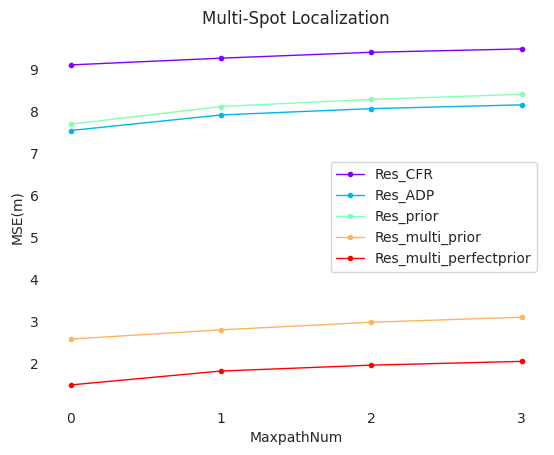

In [65]:
draw_line_charts_marker(df_maxpathnum.iloc[0:, 1:6])

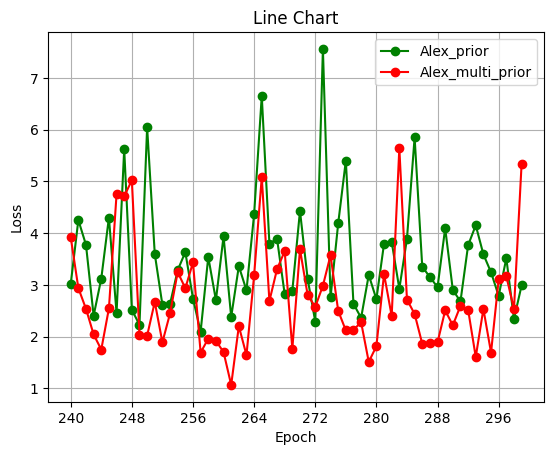

In [70]:
draw_line_charts_marker(df.iloc[240:, [1,2]])

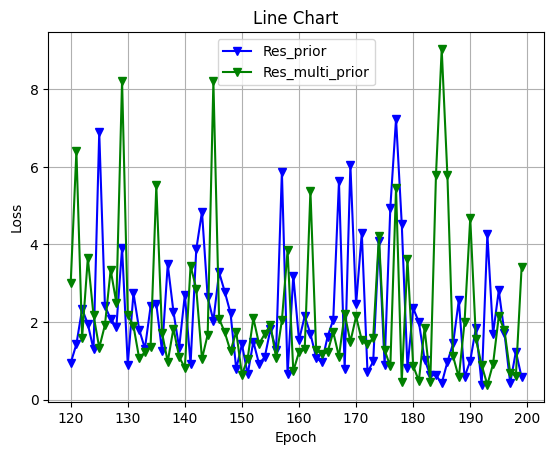

In [88]:
draw_line_charts_marker(df.iloc[120:200,1:])

箱图

In [14]:
#data
import seaborn as sns
# path_box = '/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/draw/WAIRD/box.csv'
path_box = '/data2/wbh/DeepMIMO-5GNR-localpycharm/tasks/0_WAIRD/results/draw/WAIRD/box_00743_10_0.001_res.csv'
df_box = pd.read_csv(path_box)
df_box

,Res_CFR,Res_ADP,Res_CFRADP,Res_multi_CFRADP,Res_multi_perfectCFRADP
0,3.111522,6.460022,3.885218,3.148162,0.381526
1,5.897087,2.651824,3.739956,4.343253,1.138356
2,1.046255,4.878191,1.413199,2.583339,0.836897
3,4.508296,4.911593,0.520139,1.512417,0.748199
4,2.619866,4.269142,1.653051,1.639303,1.560000
...,...,...,...,...,...
314,0.521130,9.754833,8.265117,3.063784,0.338824
315,7.965981,2.320367,0.884453,3.593453,0.946635
316,2.212391,1.698385,2.077499,2.614318,0.638072
317,0.926388,5.030941,6.453519,3.079896,2.100505


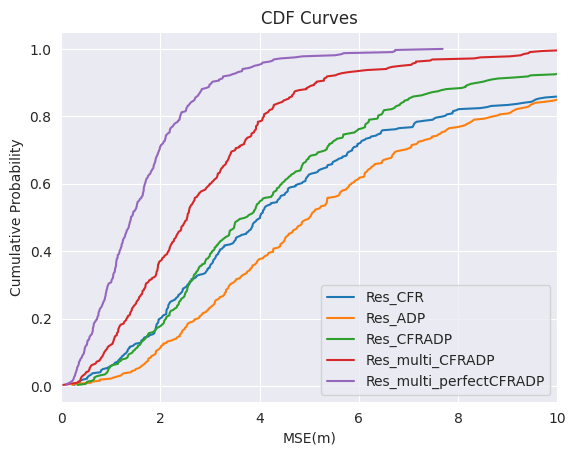

In [74]:
#CDF曲线图
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = df_box

# Get the column names
columns = data.columns

# Create a new figure and axis for the plot
fig, ax = plt.subplots()

# Plot CDF curve for each column
for column in columns:
    # Sort the values in the column
    sorted_data = data[column].sort_values()
    
    # Calculate the cumulative probabilities
    cdf = sorted_data.rank() / len(sorted_data)
    
    # Plot the CDF curve
    ax.plot(sorted_data, cdf, label=column)

# Set plot labels and title
ax.set_xlabel('MSE(m)')
ax.set_ylabel('Cumulative Probability')
ax.set_title('CDF Curves')

# Set the x-axis limit
ax.set_xlim(0, 10)

# Display the legend
ax.legend()

# Show the plot
plt.show()


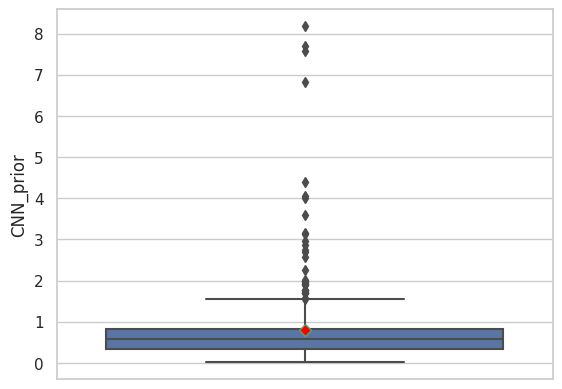

In [118]:
#箱图
df_box['CNN_prior'].describe()
plt.figure(dpi=100)
sns.boxplot(y=df_box['CNN_prior'],#传入一组数据
            orient='v',#箱子垂直显示，默认为'h'水平显示
            showmeans=True,#箱图显示均值，
            meanprops = {'marker':'D','markerfacecolor':'red'},#设置均值属性
           )
plt.show()
# plt.figure(dpi=100)
# class_name=[iris.target_names[0] if i==0.0 else iris.target_names[1] if i==1.0 else iris.target_names[2] for i in pd_iris['class']]
# sns.boxplot(x=class_name,#按照pd_iris["sepal width(cm)"]分组，即按照每种鸢尾花（'setosa', 'versicolor', 'virginica'）分组绘图
#             y=pd_iris["sepal width(cm)"],#绘图数据
#             orient='v'
#            )
# plt.show()

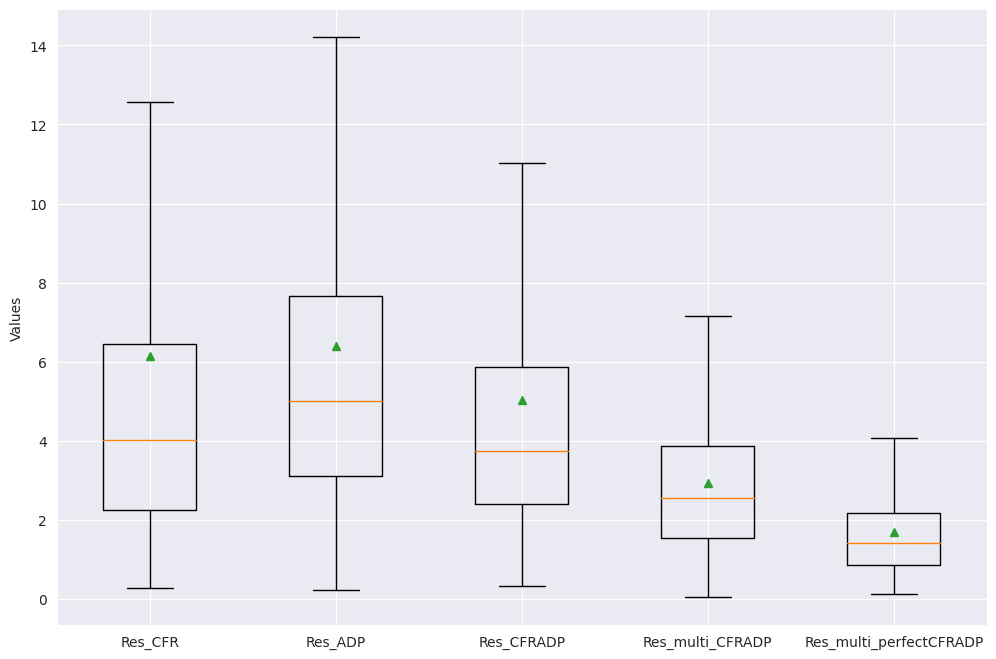

In [15]:
# #对的分类图
# #二分类箱图
# import matplotlib.pyplot as plt

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(12,8))

# # Create box plots for Column1 and Column2
# ax.boxplot([df_box['Res_CFR'],df_box['Res_ADP'],df_box['Res_CFRADP'],df_box['Res_multi_CFRADP'],df_box['Res_multi_perfectCFRADP']]
#            , 0, '', showmeans=True, vert=True)

# # Set x-axis tick labels
# ax.set_xticklabels(['Res_CFR', 'Res_ADP', 'Res_CFRADP', 'Res_multi_CFRADP', 'Res_multi_perfectCFRADP'])

# # Set y-axis label
# ax.set_ylabel('Values')

# # Show the plot
# plt.show()


#二分类箱图
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# Create box plots for Column1 and Column2
ax.boxplot([df_box['Res_CFR'],df_box['Res_ADP'],df_box['Res_CFRADP'],df_box['Res_multi_CFRADP'],df_box['Res_multi_perfectCFRADP']]
           , 0, '', showmeans=True, vert=True)

# Set x-axis tick labels
ax.set_xticklabels(['Res_CFR', 'Res_ADP', 'Res_CFRADP', 'Res_multi_CFRADP', 'Res_multi_perfectCFRADP'])

# Set y-axis label
ax.set_ylabel('Values')

# Show the plot
plt.show()

<Axes: >

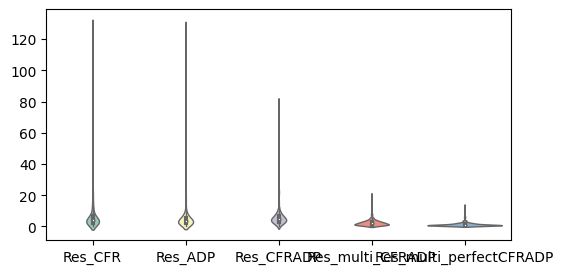

In [16]:
#小提琴图
import seaborn as sns
df_box = pd.read_csv(path_box)
# 设置窗口的大小
f, ax = plt.subplots(figsize=(6, 3))
# 绘制小提琴图
sns.violinplot(data=df_box, palette="Set3", bw=.2, cut=1, linewidth=1)

In [103]:
from sklearn import datasets
iris=datasets.load_iris()
x,y=iris.data,iris.target
y_1=np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris=pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])
pd_iris

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


画CDF图

In [ ]:
#chatgpt计算的图，明显好于上述几种
import numpy as np
import matplotlib.pyplot as plt
data = mean_coordinate.values
# calculate the CDF
x = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)

# plot the CDF
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Data')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Dataset')
plt.show()